# Analyze the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('milan_journeys.csv', encoding='latin 1')

In [3]:
df

,A_lat,A_long,A_locality,B_lat,B_long,B_locality,month,weekday,hour,car_distance,pt_distance,car_time,pt_time
0,45.479207,9.255106,Lambrate,45.490106,9.122538,Lampugnano,February,Saturday,6,27619,14836,1264,5254
1,45.444993,9.183651,Morivione,45.485853,9.211293,Centrale,December,Saturday,22,7263,8752,1057,2615
2,45.485023,9.235246,Città Studi,45.442808,9.214710,Lodi - Corvetto,November,Thursday,7,12147,8526,929,1842
3,45.437131,9.237847,Rogoredo,45.442030,9.190021,Ex Om - Morivione,November,Sunday,13,7964,7098,923,2842
4,45.510587,9.210027,Segnano,45.448695,9.135714,Giambellino,June,Thursday,2,12081,12935,1439,13252
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6241,45.508498,9.146301,Villapizzone,45.472448,9.150443,De Angeli - Monte Rosa,January,Monday,6,8145,9731,808,3321
6242,45.443520,9.151815,San Cristoforo,45.426380,9.190590,Stadera,November,Sunday,16,5074,5379,691,3553
6243,45.431814,9.126447,Ronchetto sul Naviglio,45.460158,9.142681,Arzaga,July,Tuesday,3,5445,5227,549,6297
6244,45.503058,9.250507,Cimiano,45.479710,9.116525,San Siro,August,Tuesday,13,26239,17451,1725,4166


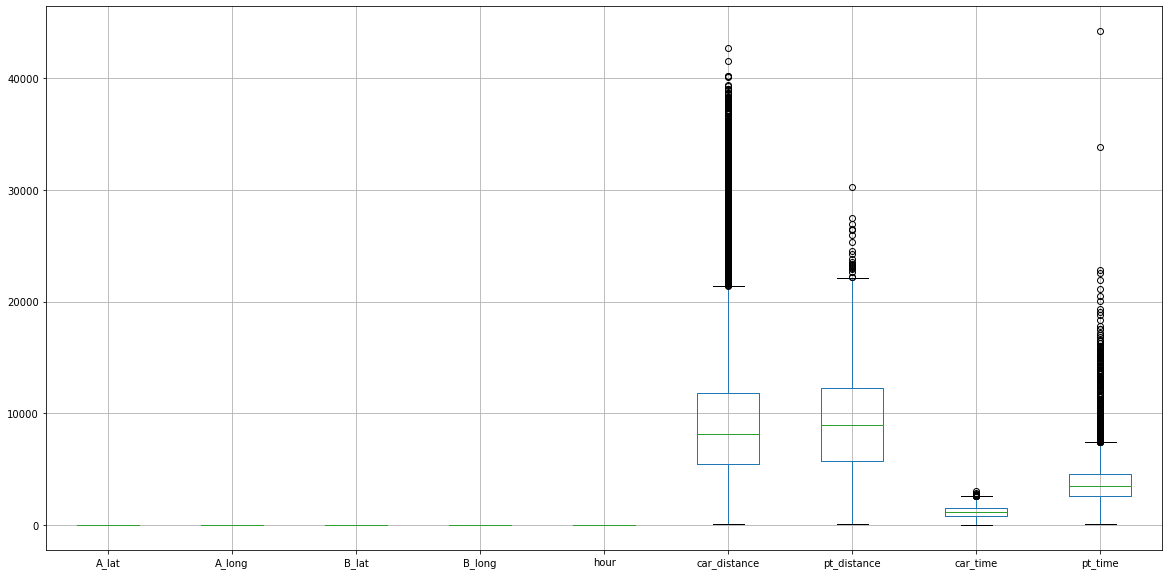

In [4]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

In [5]:
def blowup(df):
    D = df.select_dtypes(exclude=['int64', 'float64'])
    D1 = pd.DataFrame()
    
    for attribute in list(D.columns):
        for value in D[attribute].unique():
            if value not in D1.columns:
                D1[value] = (D.loc[:,attribute] == value).apply(int)
            else:
                D1[value] = D1[value] | (D.loc[:,attribute] == value).apply(int)
    
    D2 = df.select_dtypes(include=['int64', 'float64'])
    D2 = pd.merge(D2, D1, left_index=True, right_index=True)
    
    return D2

def reorder_columns(df):
    attributes = df.columns.tolist()
    
    coordinates = attributes[:5]
    result = attributes[5:9]
    locality = attributes[9:-19]
    month = attributes[-19:-7]
    weekday = attributes[-7:]
    
    Olocality = sorted(locality)
    Omonth = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    Oweekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    ordered = coordinates +\
                Oweekday +\
                Omonth +\
                Olocality +\
                result
                 
    return df[ordered]   
    

In [6]:
target = ['car_distance', 'pt_distance', 'car_time', 'pt_time']
blowdf = reorder_columns(blowup(df))
blowdf.loc[:,target].describe()

,car_distance,pt_distance,car_time,pt_time
count,6246.000000,6246.000000,6246.000000,6246.000000
mean,10409.996958,9207.338617,1160.786263,3853.387288
std,7926.948367,4575.243793,496.376566,2188.231831
min,127.000000,105.000000,35.000000,115.000000
25%,5432.000000,5707.000000,787.000000,2632.000000
50%,8185.500000,8970.000000,1142.000000,3514.500000
75%,11816.250000,12289.500000,1507.000000,4549.000000
max,42666.000000,30269.000000,3063.000000,44197.000000


In [7]:
car_distance = blowdf['car_distance']
pt_distance = blowdf['pt_distance']
car_time = blowdf['car_time']
pt_time = blowdf['pt_time']

CARtime_avg = car_time.mean() * np.ones(len(car_time))
PTtime_avg = pt_time.mean() * np.ones(len(pt_time))
CARtime_std = car_time.std() * np.ones(len(car_time))
PTtime_std = pt_time.std() * np.ones(len(pt_time))

CARdistance_avg = car_distance.mean() * np.ones(len(car_distance))
PTdistance_avg = pt_distance.mean() * np.ones(len(pt_distance))
CARdistance_std = car_distance.std() * np.ones(len(car_distance))
PTdistance_std = pt_distance.std() * np.ones(len(pt_distance))

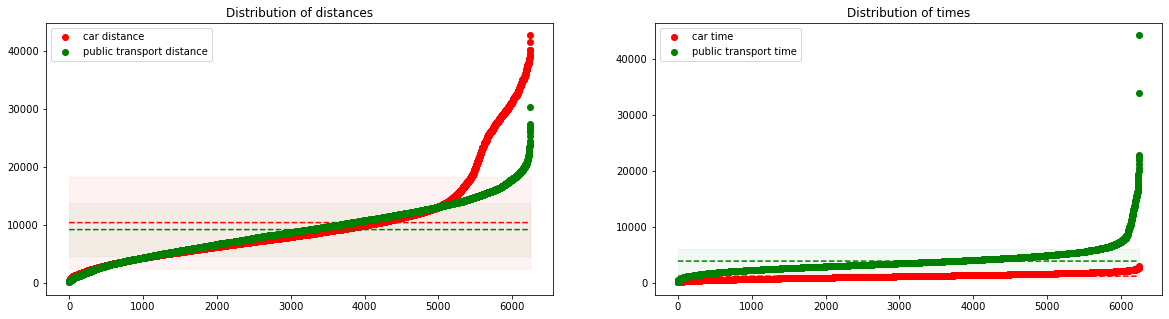

In [8]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.title('Distribution of distances')
plt.plot(sorted(car_distance), 'o', c='r', label='car distance')
plt.plot(CARdistance_avg, '--', c='r')
plt.plot(sorted(pt_distance), 'o', c='g', label='public transport distance')
plt.plot(PTdistance_avg, '--', c='g')

plt.fill_between(range(len(car_distance)), CARdistance_avg-CARdistance_std, CARdistance_avg+CARdistance_std, color='r', alpha=0.05)
plt.fill_between(range(len(pt_distance)), PTdistance_avg-PTdistance_std, PTdistance_avg+PTdistance_std, color='g', alpha=0.05)


plt.legend()

plt.subplot(122)
plt.title('Distribution of times')
plt.plot(sorted(car_time), 'o', c='r', label='car time')
plt.plot(CARtime_avg, '--', c='r')
plt.plot(sorted(pt_time), 'o', c='g', label='public transport time')
plt.plot(PTtime_avg, '--', c='g')
plt.fill_between(range(len(car_time)), CARtime_avg-CARtime_std, CARtime_avg+CARtime_std, color='r', alpha=0.05)
plt.fill_between(range(len(pt_time)), PTtime_avg-PTtime_std, PTtime_avg+PTtime_std, color='g', alpha=0.05)


plt.legend()

plt.show()

In [9]:
hourdf = blowdf.groupby('hour').agg('mean')
hourdf.loc[:, target].head()

,car_distance,pt_distance,car_time,pt_time
hour,,,,
0,9988.467742,9958.629032,1027.862903,5077.165323
1,9151.127660,9622.475177,959.868794,6053.531915
2,9518.938462,10317.773077,986.738462,6678.373077
3,9541.451362,9686.112840,992.603113,5822.381323
4,9176.513944,9249.127490,972.669323,4872.545817


In [10]:
car_speed = car_distance/car_time
pt_speed = pt_distance/pt_time

CARhour_speed = hourdf['car_distance'] / hourdf['car_time']
PThour_speed = hourdf['pt_distance'] / hourdf['pt_time']

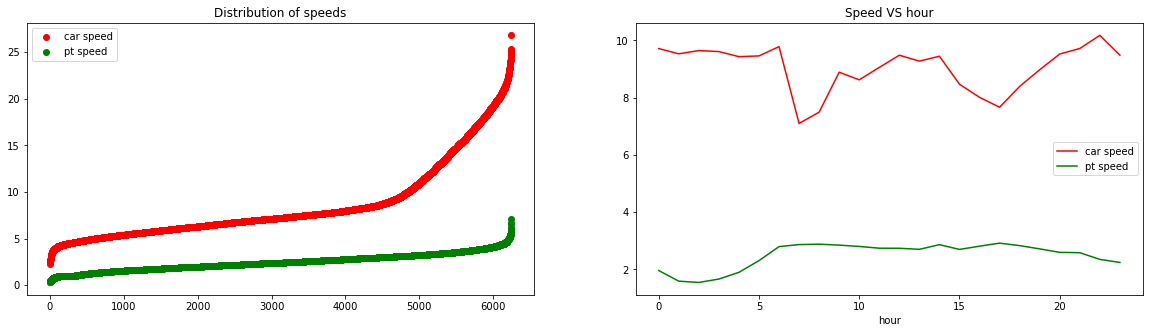

In [11]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.title('Distribution of speeds')
plt.plot(sorted(car_speed), 'o', c='r', label='car speed')
plt.plot(sorted(pt_speed), 'o', c='g', label='pt speed')

plt.legend()

plt.subplot(122)
plt.title('Speed VS hour')
plt.plot(CARhour_speed, c='r', label='car speed')
plt.plot(PThour_speed, c='g', label='pt speed')
plt.xlabel('hour')

plt.legend()

plt.show()

# Regression

In [12]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [13]:
tree_regressor = tree.DecisionTreeRegressor()

dropme = ['car_time', 'pt_time']

X = blowdf.drop(dropme, axis=1).values
y = blowdf['pt_time'] / blowdf['car_time']

tree_regressor.fit(X, y)

DecisionTreeRegressor()

In [14]:
cross_val_score(tree_regressor, X, y)

array([-0.07129059,  0.14948164,  0.19261236,  0.09318123,  0.36757296])